<h1>线性回归_梯度下降<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#工具包" data-toc-modified-id="工具包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>工具包</a></span></li><li><span><a href="#数据" data-toc-modified-id="数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据</a></span></li><li><span><a href="#函数$h(x)$" data-toc-modified-id="函数$h(x)$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>函数$h(x)$</a></span></li><li><span><a href="#梯度下降" data-toc-modified-id="梯度下降-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>梯度下降</a></span><ul class="toc-item"><li><span><a href="#公式推导" data-toc-modified-id="公式推导-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>公式推导</a></span></li><li><span><a href="#三种梯度下降算法" data-toc-modified-id="三种梯度下降算法-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>三种梯度下降算法</a></span></li></ul></li><li><span><a href="#梯度下降算法源码" data-toc-modified-id="梯度下降算法源码-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>梯度下降算法源码</a></span><ul class="toc-item"><li><span><a href="#mini-batch" data-toc-modified-id="mini-batch-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>mini-batch</a></span></li><li><span><a href="#stochastic" data-toc-modified-id="stochastic-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>stochastic</a></span></li></ul></li></ul></div>

# 工具包

In [1]:
import numpy as np
import pandas as pd

# 数据

In [5]:
x = pd.DataFrame(np.random.randint(-5,15,(9,3))
                 , columns=['F_1','F_2','F_3']
                 , index=['x_'+str(i) for i in range(1,10)])

In [6]:
y = pd.DataFrame(np.random.randint(-5,15,(9,1))
                 , columns=['label']
                 , index=['y_'+str(i) for i in range(1,10)])

给定训练数据$D=\{\mathbf{x}_i , y_i\}_{i=1}^{m}$(**training set**),    
每组$(\mathbf{x}_i , y_i)$(**training example**)都是一组训练样例,在此例中训练总数据个数m=9   
$\mathbf{x}_i$(**features**),是n维向量,在此例中n=3,即有3个特征   
$y_i\in \mathbb{R}$(**target**),是监督学习中的目标变量,
* $y_i$是连续变量时为回归(**regression**),
* $y_i$是离散变量时为分类(**classification**)

In [7]:
for i in range(9):
    print('x_'+str(i)+'=',x.iloc[i].values
         ,'y_'+str(i)+'=',y.iloc[i].values)

x_0= [-5  5  2] y_0= [8]
x_1= [12 -3  9] y_1= [11]
x_2= [ 5 -1 -4] y_2= [2]
x_3= [1 0 6] y_3= [8]
x_4= [ 4  5 -1] y_4= [7]
x_5= [ 5 13 13] y_5= [11]
x_6= [ 1  5 -1] y_6= [-4]
x_7= [7 6 5] y_7= [-3]
x_8= [ 9 -2 10] y_8= [1]


# 函数$h(x)$

回归学习的目的是学习到一个从输入$\mathcal{X}$到输出$\mathcal{Y}$的映射$h$(**hypothesis**)   
$$h_\theta(x)=\theta_0x_0 + \theta_1x_1 + \theta_2x_2 +\theta_3x_3
$$
其中$\theta_i$(**weights/parameters**)称为权重项   
$b=\theta_0x_0,x_0=1$(**intercept term**)称为偏置项

为了简写方便,定义预测值:$\hat{y} = h(\mathbf{x})$   
$$h(x)=\sum_{i=0}^n \theta_i x_i = \theta^Tx 
$$
其中,$x_0=1, n=特征维数$, 此例中$n=3$

为了定量描述$h(x)$ 与原始数据标签$y$的拟合程度   
定义损失函数$J(\theta)$(**cost function**)
$$J(\theta)=\frac{1}{2} \sum_{i=1}^{m}
\big( h_\theta(\mathbf{x}_i) -y_i \big) ^2
$$

那么, $h(x), y$两者之间拟合的越好,    
也就意味着损失函数$J(\theta)$也就越小   
于是问题就转换成求使$J(\theta)$最小时的$\theta$的值

# 梯度下降

## 公式推导

求使$J(\theta)$最小时的$\theta$的值的一个最常用的算法便是梯度下降(**gradient descent**),   
$$
一阶导=0: \frac{\partial J(\mathbf{W})}{\partial \mathbf{W}}=0\\
二阶导>0: \frac{\partial J^2(\mathbf{W})}{\partial \mathbf{W}}>0
$$

现有理论已证明,   
* 沿着负梯度的方向,下降最快   

该算法使用步骤
1. 初始化$\theta$,如全部赋值0,或$(0.1,\sigma^2)$
2. 构建损失函数,构建更新公式,学习率递减
3. 重复固定步数的2,或重复2直到梯度下降很小时   

另一种理解:   
1. 则在优化时, 随机选取一点, 
2. 计算该点梯度, 并以负梯度方向更新所选取的点;    
3. 一直重复更新, 直到梯度变化很小, 则停止更新, 
4. 此时的点非常接近我们要找的梯度为0的点

梯度更新公式为
$$\theta_j := \theta_j - \lambda\frac{\partial}{\partial\theta_j}J(\theta)
$$
$\lambda$(**learning rate**),为每步更新的步长,又称学习率,   
学习率为超参数, 由我们自己定义   
在梯度下降的后期,梯度$\frac{\partial}{\partial\theta_j}J(\theta)$变化减小,$\lambda$也相应变小,   
如$\lambda=\lambda*0.93$

梯度推导过程:
$$
\begin{equation}
\begin{aligned}
\frac{\partial}{\partial \theta_j}J(\theta)
&=\frac{\partial}{\partial \theta_j}\frac{1}{2}
(h_\theta(x)-y )^2\\
&=2 \cdot \frac{1}{2}(h_\theta(x)-y) \cdot
\frac{\partial}{\partial \theta_j} (h_\theta(x)-y )^2\\
&=(h_\theta(x)-y) \cdot
\frac{\partial}{\partial \theta_j}
\left(\sum_{i=0}^{n}\theta_i x_i-y \right)\\
&=(h_\theta(x)-y)x_j
\end{aligned}
\end{equation}
$$

则相应的梯度更新公式为:
$$
\theta_j := \theta_j - 
\lambda(h_\theta(x) - y)x_j\\
\theta_j := \theta_j + 
\lambda(y - h_\theta(x))x_j
$$
此公式被称为:最小均方算法(**LMS** least mean squares)   
其中$y - h_\theta(x)$也可以看做是误差项(**error term**)

## 三种梯度下降算法

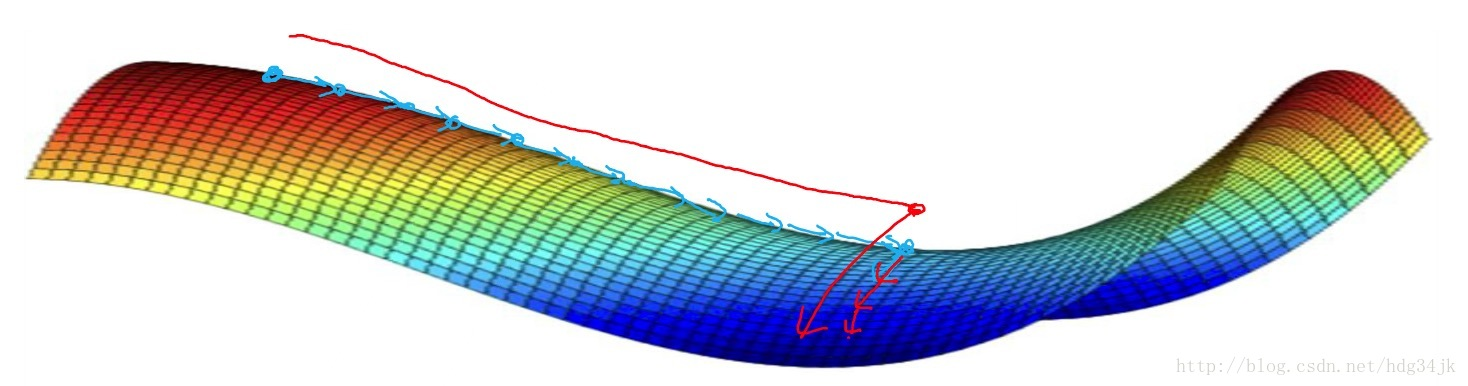

批量梯度下降算法(**Batch gradient descent**)   
* 将训练集所有的梯度计算之后,再更新参数   
* 大部分时间浪费在计算梯度上   

更新公式为:
$$\theta_j := \theta_j + 
\lambda \sum_{i=1}^{m}(y_i - h_\theta(x_i))x_j\\
m=全体数据$$

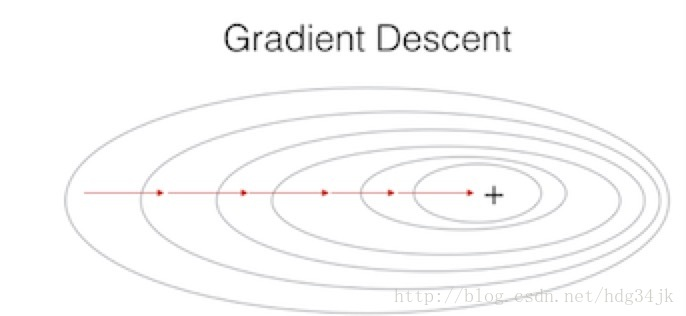

小批量梯度下降算法(**Mini-Batch gradient descent**)   
* 将训练集抽取出一部分,计算梯度之后,再更新参数   

更新公式为:
$$\theta_j := \theta_j + 
\lambda \sum_{i=1}^{m}(y_i - h_\theta(x_i))x_j\\
m=32或64或100等等
$$

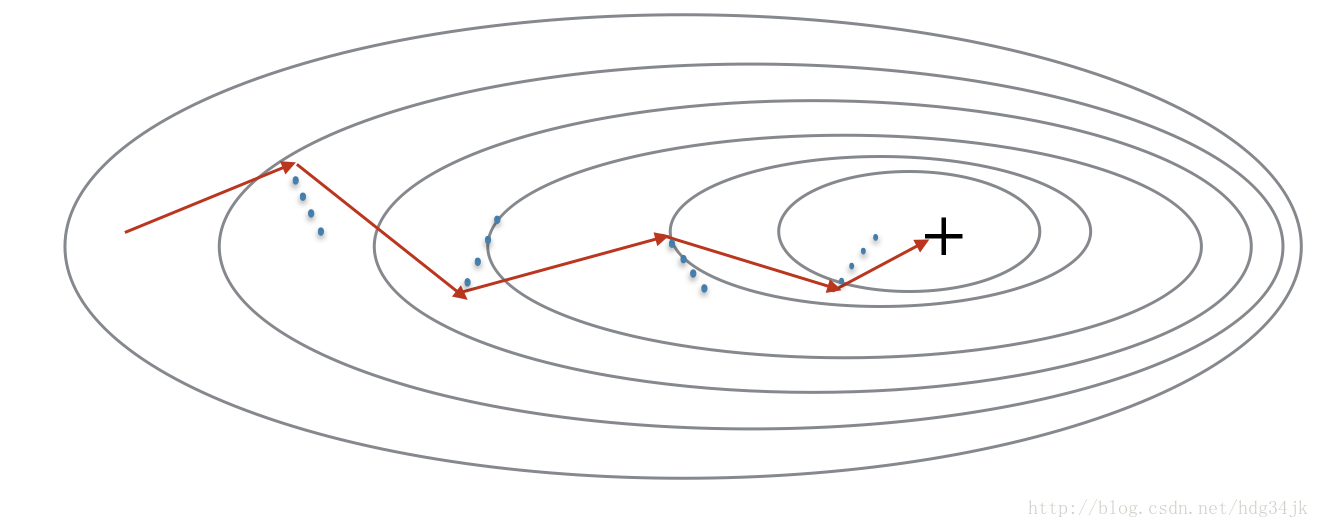

随机梯度下降(**Stochastic gradient descent**)
* 第次只取一个样本进行梯度更新   

$$\theta_j := \theta_j + 
\lambda \sum_{i=1}^{m}(y_i - h_\theta(x_i))x_j\\
m=1
$$

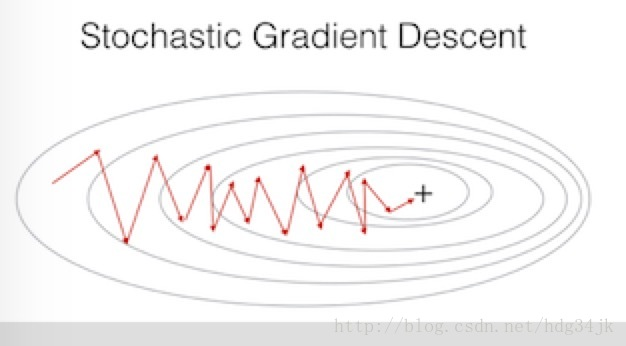

**三者优缺点对比**

* Stochastic gradient descent无法利用向量化, 并行运算受限, mini-batch和batch gradient decent可以利用向量化, 有并行运算优势;
* Stochastic gradient descent很难收敛到最优点, 只能无限接近最优点, mini-batch和batch gradient decent可以收敛到最优点;
* Stochastic gradient descent和mini-batch收敛速度快, batch gradient decent收敛速度慢. 

# 梯度下降算法源码

## mini-batch

In [8]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = int(math.floor(m/mini_batch_size)) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size:(k + 1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, (k + 1) * mini_batch_size:m]
        mini_batch_Y = shuffled_Y[:, (k + 1) * mini_batch_size:m]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

## stochastic

In [9]:
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost = compute_cost(a, Y[:,j])
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters.
        parameters = update_parameters(parameters, grads)

NameError: name 'data_input' is not defined